## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
X.shape

(50,)

In [6]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

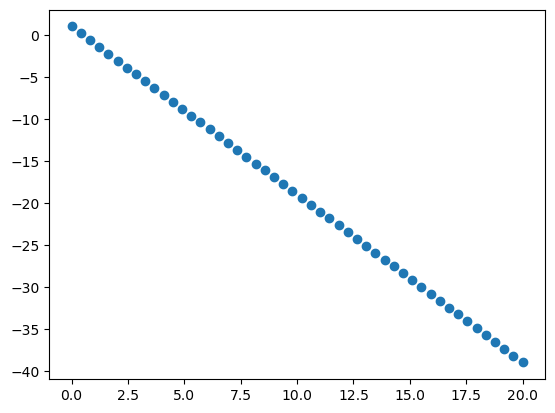

In [6]:
plt.scatter(X,y)

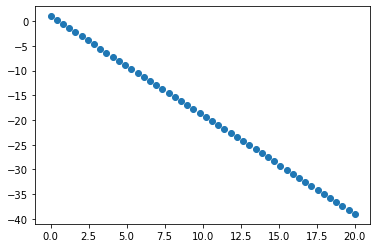

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [1]:
def gradient_descent_function(X,Y,lr,_max_number_of_iteration):
    theta_0_new=0
    theta_1_new=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    h_x_array=[]
    for i in range(_max_number_of_iteration):
        print(f'****************** Iteration {i} ******************** \n\n')
        theta_0_array.append(theta_0_new)
        theta_1_array.append(theta_1_new)
        h_x=theta_0_new+theta_1_new*X
        h_x_array.append(h_x)
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        loss_array.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        if np.linalg.norm(gradient_vector)<0.3:
            print("break as gradient vector is almost 0")
            break
        if len(loss_array)>1 and np.abs((loss_array[-2]-loss_array[-1]))<.0001:
            print("break as loss almost 0")
            break
        theta_0_new=theta_0_new-lr*d_theta_0
        theta_1_new=theta_1_new-lr*d_theta_1
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
    return theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [35]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=gradient_descent_function(X,y,0.0005,300)

****************** Iteration 0 ******************** 


error_vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j 249.88775510204087
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 260.08269357432516
theta_0_new -0.0095
theta_0_new -0.12969387755102044
****************** Iteration 1 ******************** 


error_vector [-1.0095     -0.24610975  0.51728051  1.28067076  2.04406102  2.80745127
  3.57084152  4.33423178  5.09762203  5.861

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [36]:
h_x=theta_0_new+theta_1_new*X

In [37]:
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976312051531401


r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

Text(0, 0.5, 'loss')

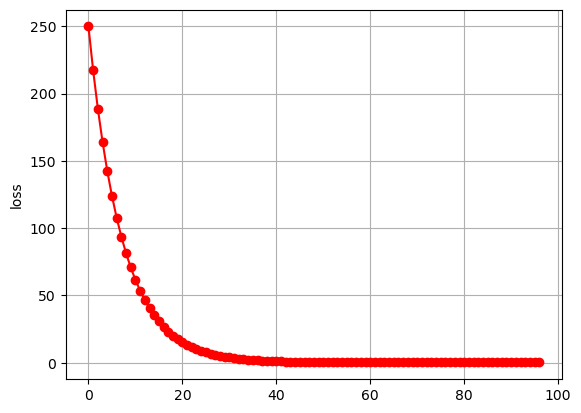

In [17]:
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

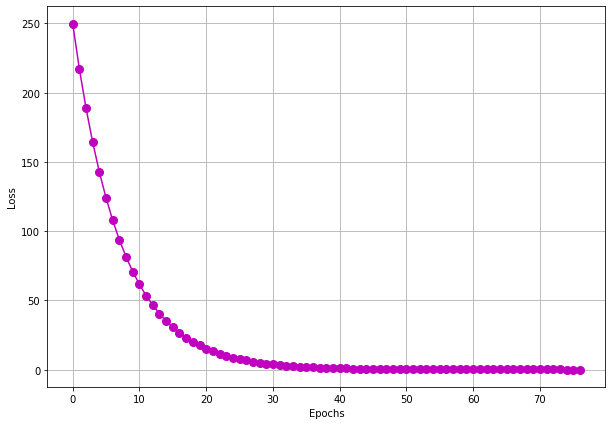

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

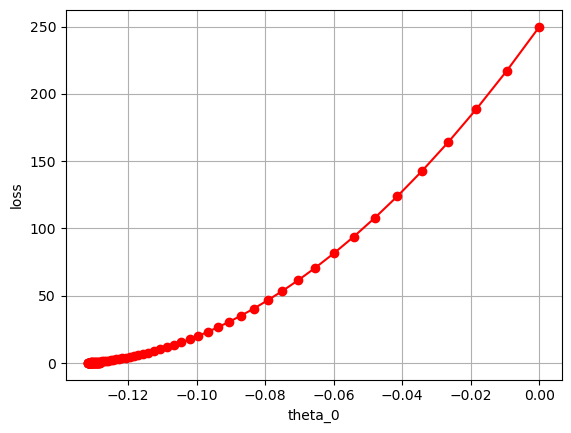

In [18]:
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

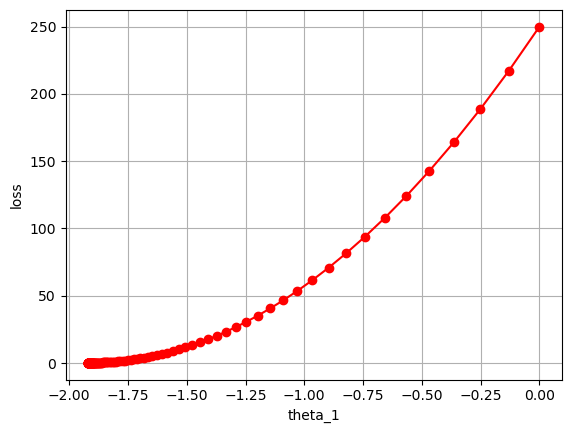

In [21]:
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

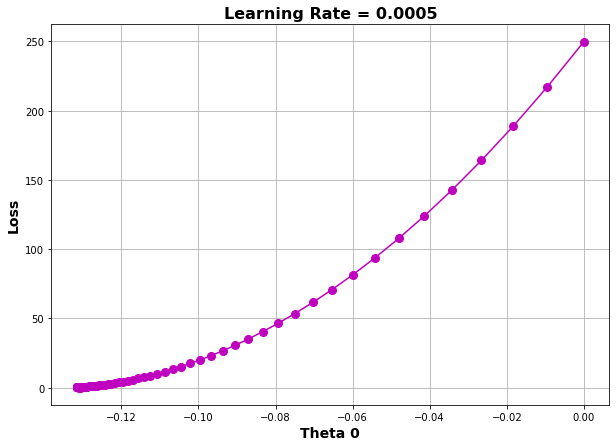

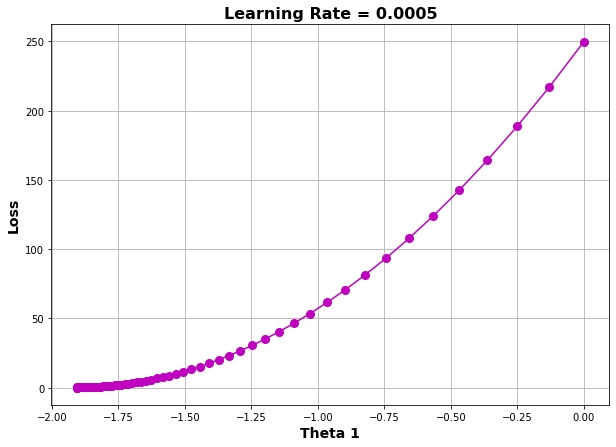

#### Plot all regression lines till converge

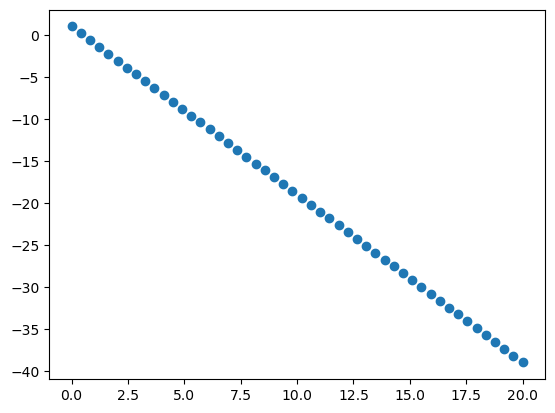

In [22]:
plt.scatter(X,y)

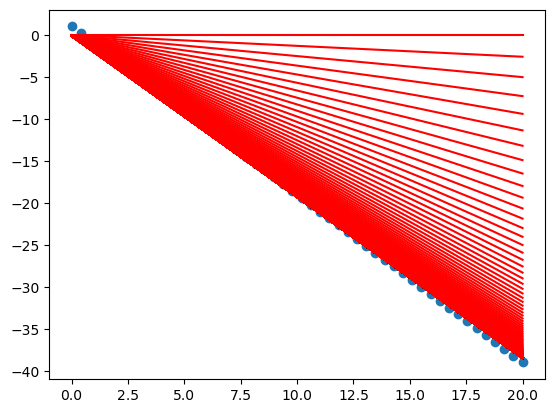

In [23]:
plt.scatter(X,y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")

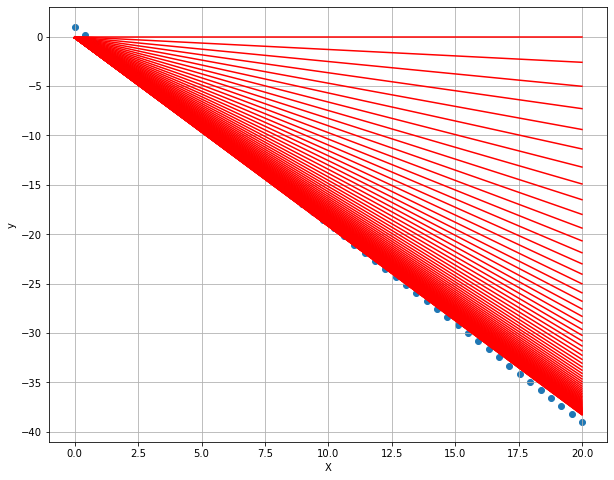

#### Plot the best regression line

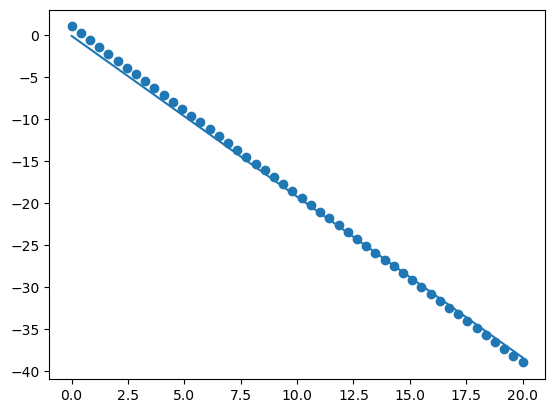

In [38]:
plt.scatter(X,y)
plt.plot(X,h_x)

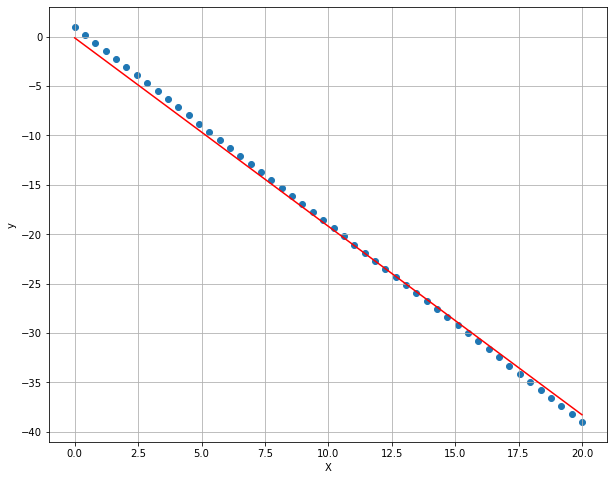

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [7]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=gradient_descent_function(X,y,0.00005,1000)

****************** Iteration 0 ******************** 


error_vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j 249.88775510204087
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 260.08269357432516
theta_0_new -0.00095
theta_0_new -0.012969387755102042
****************** Iteration 1 ******************** 


error_vector [-1.00095    -0.1899171   0.62111581  1.43214871  2.24318161  3.05421451
  3.86524742  4.67628032  5.48731322  6.2

Gradient Vector Norm: 12.143319980096013
theta_0_new -0.12924790166135317
theta_0_new -1.8267292636635326
****************** Iteration 452 ******************** 


error_vector [-1.12924790e+00 -1.05852515e+00 -9.87802403e-01 -9.17079653e-01
 -8.46356904e-01 -7.75634154e-01 -7.04911405e-01 -6.34188655e-01
 -5.63465905e-01 -4.92743156e-01 -4.22020406e-01 -3.51297657e-01
 -2.80574907e-01 -2.09852158e-01 -1.39129408e-01 -6.84066588e-02
  2.31609074e-03  7.30388403e-02  1.43761590e-01  2.14484339e-01
  2.85207089e-01  3.55929838e-01  4.26652588e-01  4.97375337e-01
  5.68098087e-01  6.38820836e-01  7.09543586e-01  7.80266336e-01
  8.50989085e-01  9.21711835e-01  9.92434584e-01  1.06315733e+00
  1.13388008e+00  1.20460283e+00  1.27532558e+00  1.34604833e+00
  1.41677108e+00  1.48749383e+00  1.55821658e+00  1.62893933e+00
  1.69966208e+00  1.77038483e+00  1.84110758e+00  1.91183033e+00
  1.98255308e+00  2.05327583e+00  2.12399858e+00  2.19472133e+00
  2.26544408e+00  2.33616683e+00]
j 0.702884

Gradient Vector Norm: 3.396451701332896
theta_0_new -0.13127923016896176
theta_0_new -1.8909663557146492
****************** Iteration 640 ******************** 


error_vector [-1.13127923 -1.0867757  -1.04227217 -0.99776865 -0.95326512 -0.90876159
 -0.86425806 -0.81975453 -0.775251   -0.73074748 -0.68624395 -0.64174042
 -0.59723689 -0.55273336 -0.50822983 -0.46372631 -0.41922278 -0.37471925
 -0.33021572 -0.28571219 -0.24120866 -0.19670514 -0.15220161 -0.10769808
 -0.06319455 -0.01869102  0.02581251  0.07031603  0.11481956  0.15932309
  0.20382662  0.24833015  0.29283367  0.3373372   0.38184073  0.42634426
  0.47084779  0.51535132  0.55985484  0.60435837  0.6488619   0.69336543
  0.73786896  0.78237249  0.82687601  0.87137954  0.91588307  0.9603866
  1.00489013  1.04939366]
j 0.20706438547214542
d_theta_0 -0.13127923016896176
d_theta_1 -1.8909663557146492
Gradient Vector Norm: 3.3736204838159076
theta_0_new -0.13127718302959598
theta_0_new -1.8911350243161804
****************** Iteratio

error_vector [-1.13057425 -1.09172437 -1.05287448 -1.01402459 -0.9751747  -0.93632481
 -0.89747492 -0.85862503 -0.81977515 -0.78092526 -0.74207537 -0.70322548
 -0.66437559 -0.6255257  -0.58667581 -0.54782593 -0.50897604 -0.47012615
 -0.43127626 -0.39242637 -0.35357648 -0.31472659 -0.27587671 -0.23702682
 -0.19817693 -0.15932704 -0.12047715 -0.08162726 -0.04277737 -0.00392749
  0.0349224   0.07377229  0.11262218  0.15147207  0.19032196  0.22917185
  0.26802173  0.30687162  0.34572151  0.3845714   0.42342129  0.46227118
  0.50112106  0.53997095  0.57882084  0.61767073  0.65652062  0.69537051
  0.7342204   0.77307028]
j 0.1731334394904166
d_theta_0 -0.13057425358553404
d_theta_1 -1.904817773083849
Gradient Vector Norm: 1.525231462651989
theta_0_new -0.13056531598631282
theta_0_new -1.90489350911792
****************** Iteration 760 ******************** 


error_vector [-1.13056532 -1.09174634 -1.05292736 -1.01410839 -0.97528941 -0.93647044
 -0.89765146 -0.85883248 -0.82001351 -0.78119453 -

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [39]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976312051531401


r2_score: 0.9965793400861428


Text(0, 0.5, 'Y')

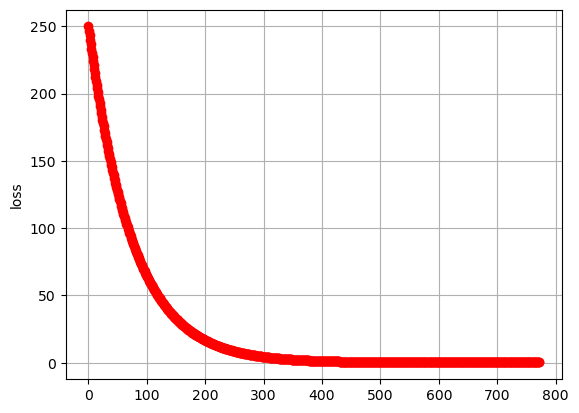

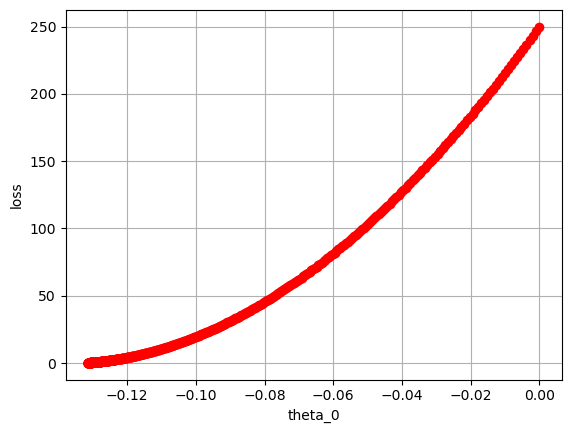

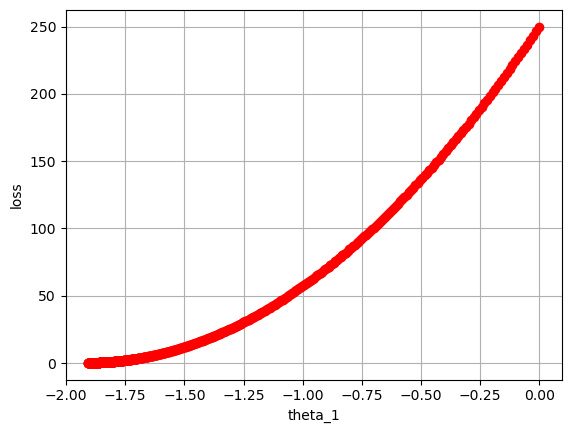

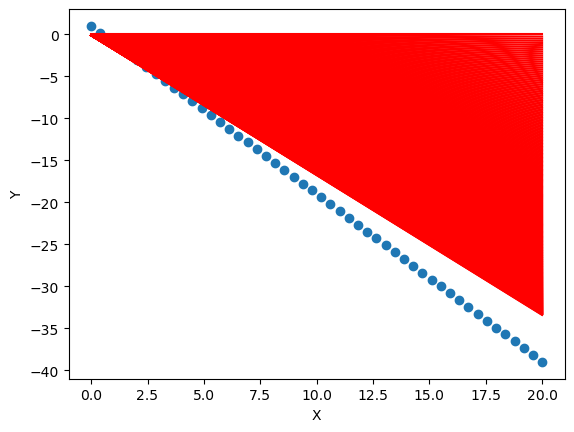

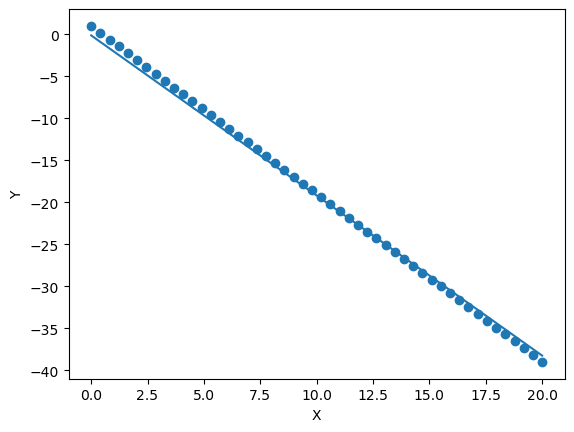

In [9]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

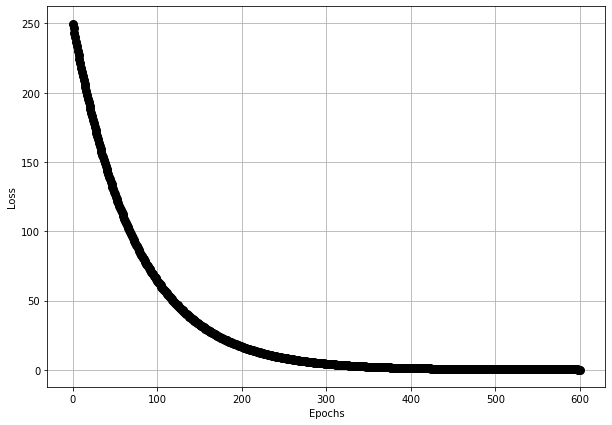

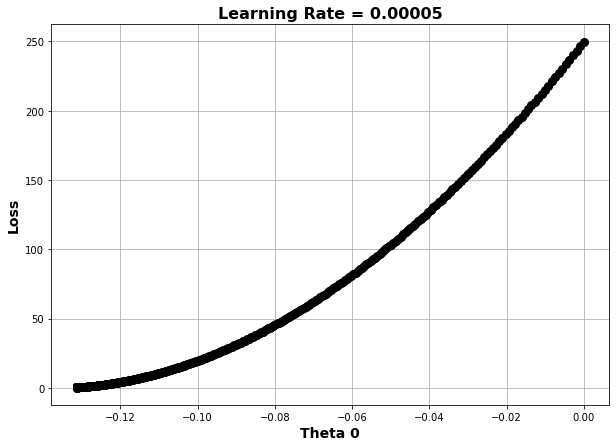

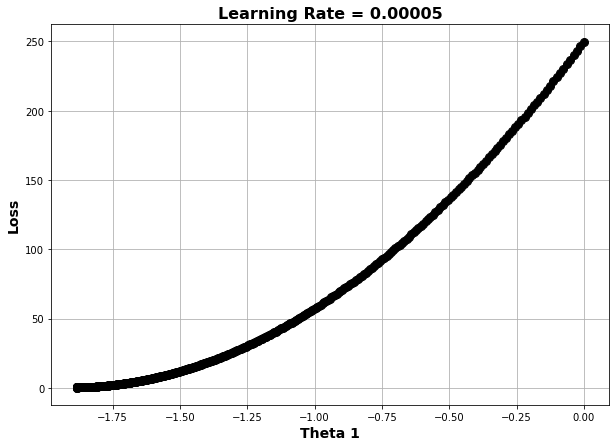

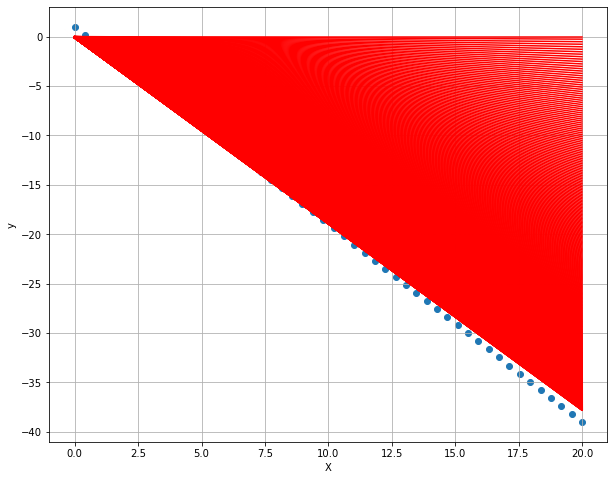

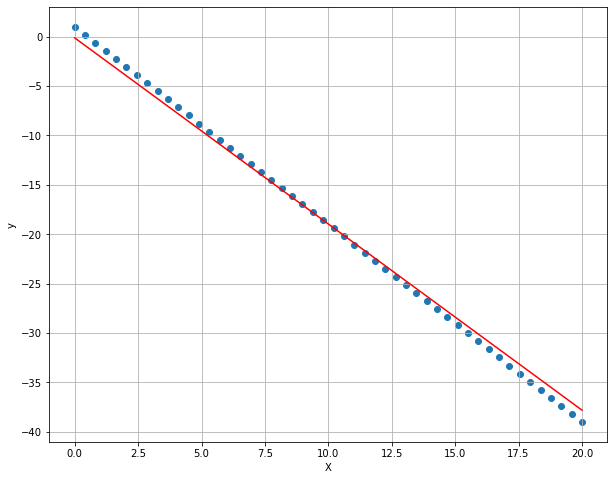

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [10]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=gradient_descent_function(X,y,0.005,300)

****************** Iteration 0 ******************** 


error_vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j 249.88775510204087
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 260.08269357432516
theta_0_new -0.095
theta_0_new -1.2969387755102042
****************** Iteration 1 ******************** 


error_vector [-1.095      -0.80803623 -0.52107247 -0.2341087   0.05285506  0.33981883
  0.62678259  0.91374636  1.20071012  1.48767

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [11]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976265938305019


r2_score: 0.9976200723230484


Text(0, 0.5, 'Y')

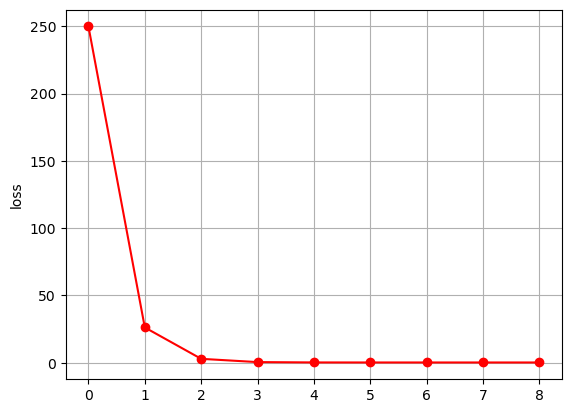

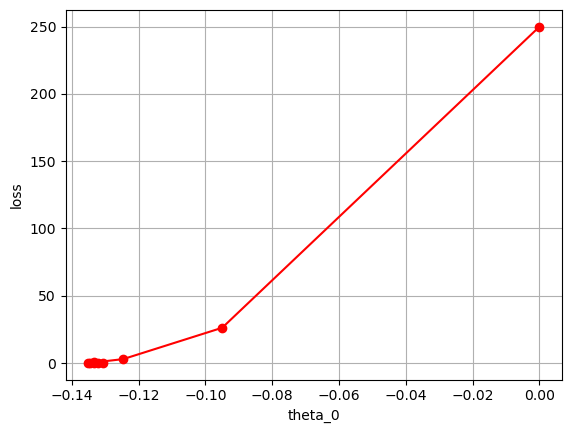

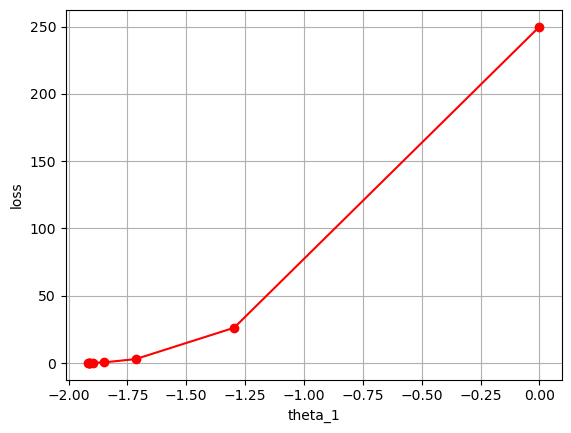

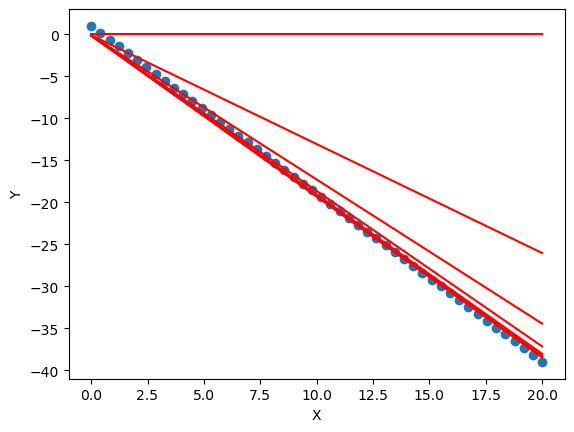

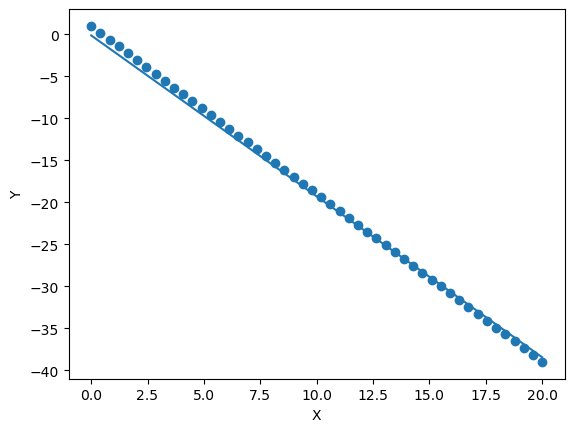

In [12]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

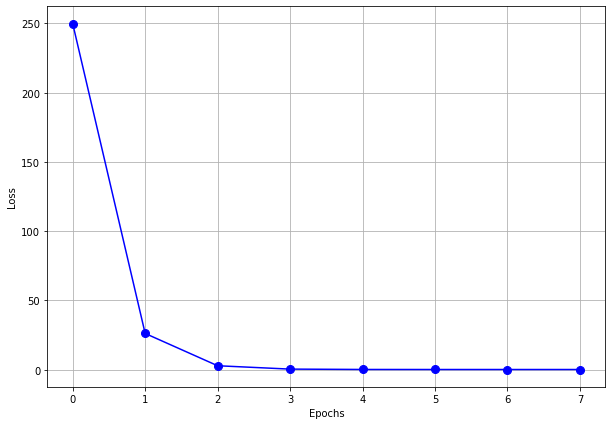

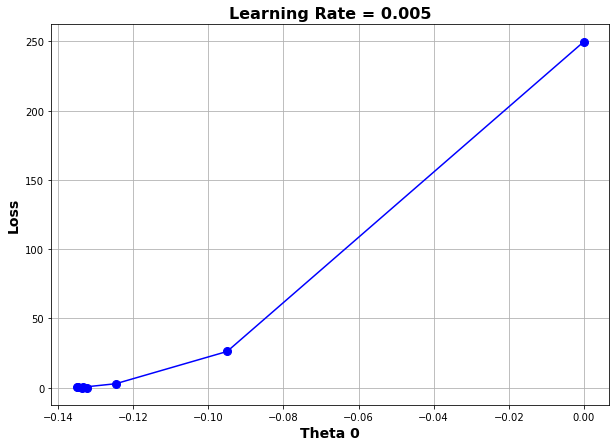

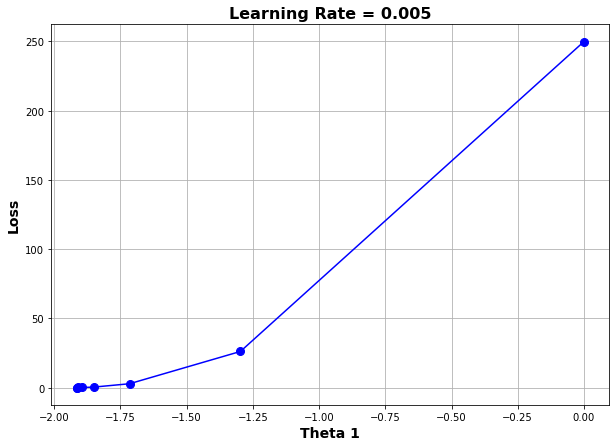

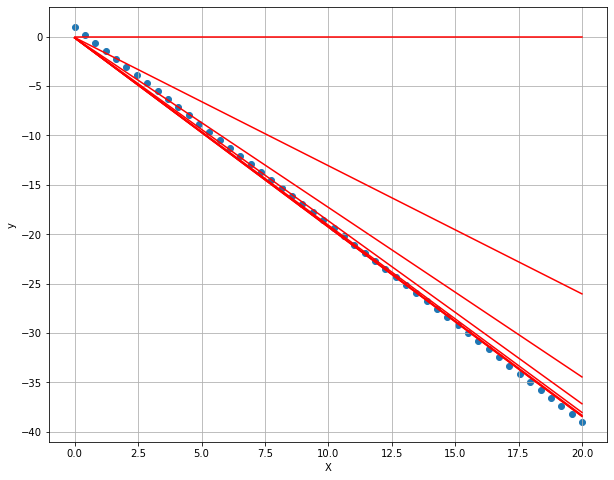

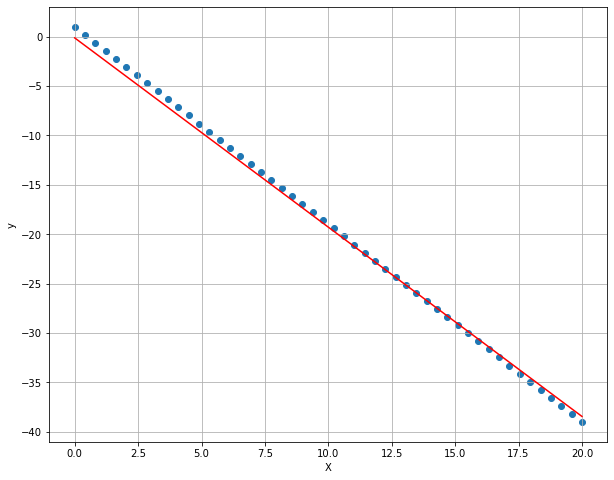

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [13]:
def Stochastic_GD_descent_function(X,Y,lr,_max_number_of_iteration):
    theta_0_new=0
    theta_1_new=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    h_x_array=[]
    perm = np.random.permutation(len(X))
    X = X[perm]
    Y = Y[perm]
    gradient_loss_checker=[]
    for i in range(_max_number_of_iteration):
        print(f'\n\n****************** Epoch {i} ******************** \n\n')
        for data_x,data_y in zip(X,Y):
            theta_0_array.append(theta_0_new)
            theta_1_array.append(theta_1_new)
            h_x=theta_0_new+theta_1_new*data_x
            error_vector=h_x-data_y
            j=error_vector**2/2
            loss_array.append(j)
            d_theta_0=error_vector
            d_theta_1=(error_vector*data_x)
            
            gradient_vector=np.array([d_theta_0,d_theta_1])
           
            theta_0_new=theta_0_new-lr*d_theta_0
            theta_1_new=theta_1_new-lr*d_theta_1
        
        h_x=theta_0_new+theta_1_new*X
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        gradient_loss_checker.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        
        print("error_vector",error_vector)
        print("j",j)
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
        if np.linalg.norm(gradient_vector)<.4:
                print("break as gradient vector is almost 0")
                break
        if len(gradient_loss_checker)>1 and np.abs((gradient_loss_checker[-2]-gradient_loss_checker[-1]))<.0001:
            print("break as loss almost 0")
            break  
            
    return theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new
    

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [14]:
theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=Stochastic_GD_descent_function(X,y,0.0005,300)



****************** Epoch 0 ******************** 


error_vector [ 1.35704296  0.03277052  0.41901665  0.86044079  1.19150891 -0.07758552
  1.24668692  0.08794853 -0.85007778 -0.68454373  0.5845507   0.69490674
 -0.57418769  1.57775504 -0.24311958  0.52937268 -0.46383165  1.08115287
  0.97079683 -0.40865363 -0.79489976 -0.0224075   1.467399   -0.35347561
 -0.62936571  1.52257702  0.91561881 -0.13276354  0.80526278 -0.51900967
  0.30866061  0.25348259 -1.07078986  0.75008476 -1.01561184 -0.2982976
  0.36383863  0.19830457 -0.73972174  1.30186494  1.02597485 -0.18794156
  1.41222098  0.47419466  0.14312655 -0.96043382  1.13633089 -0.9052558
  0.63972872 -1.12596787]
j 0.34253435985166997
d_theta_0 -0.1259678741508091
d_theta_1 -1.8648138545115434
error_vector [ 1.35704296  0.03277052  0.41901665  0.86044079  1.19150891 -0.07758552
  1.24668692  0.08794853 -0.85007778 -0.68454373  0.5845507   0.69490674
 -0.57418769  1.57775504 -0.24311958  0.52937268 -0.46383165  1.08115287
  0.97079683

In [15]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976609057130796


Text(0, 0.5, 'Y')

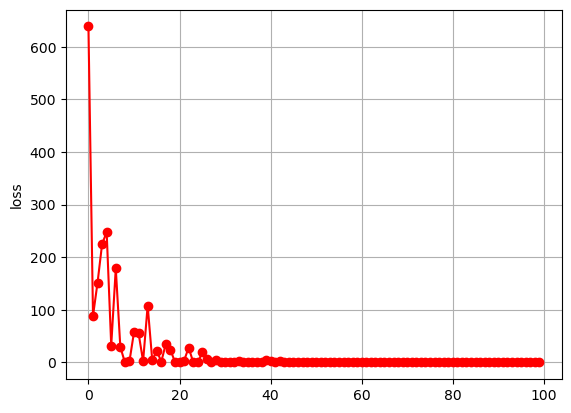

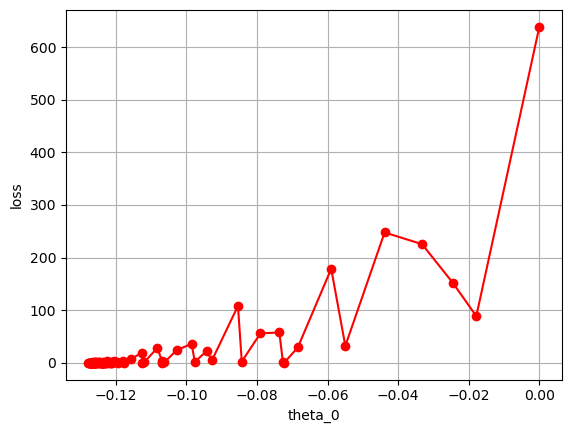

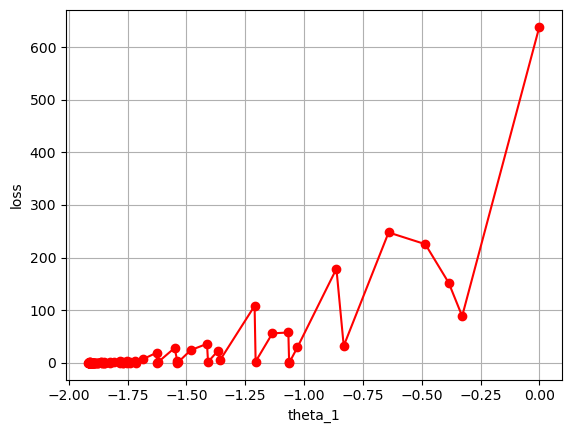

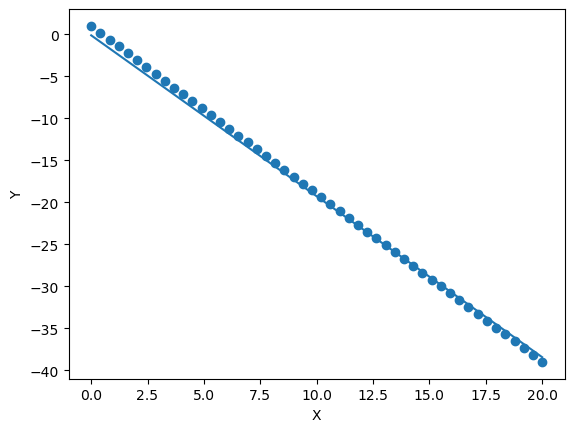

In [16]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [15]:
theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=Stochastic_GD_descent_function(X,y,0.0001,300)



****************** Epoch 0 ******************** 


error_vector [ 8.78130851  0.21549245  2.35694647  7.49643611 19.4885786  15.20567056
  9.20959932 17.77541538  0.64378325 11.77934414  6.6398545  -0.64108916
  5.78327289 15.63396137  4.92669129  3.21352807 16.91883378 13.92079815
 -1.06937996  5.35498209  2.78523727 10.92276253  4.49840048 19.06028779
 17.34712458 12.20763494 16.49054297 13.49250735  8.35301771  6.2115637
 18.20370619  7.0681453  10.49447173 13.06421655 12.63592574  7.92472691
  4.07010968  1.92865566  3.64181888 19.9168694  10.06618092 16.06225217
  1.50036486 11.35105333  1.07207406  9.63789012 14.77737976 18.63199699
 -0.21279835 14.34908896]
j 63.503444664637236
d_theta_0 -0.06937996041356821
d_theta_1 -0.9506875319744357
error_vector [ 8.78130851  0.21549245  2.35694647  7.49643611 19.4885786  15.20567056
  9.20959932 17.77541538  0.64378325 11.77934414  6.6398545  -0.64108916
  5.78327289 15.63396137  4.92669129  3.21352807 16.91883378 13.92079815
 -1.0693799

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [17]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976609057130796


Text(0, 0.5, 'Y')

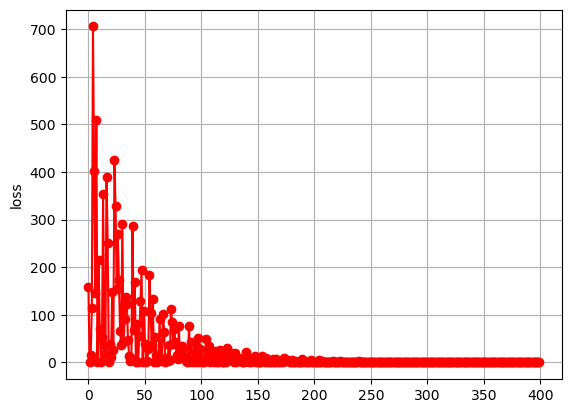

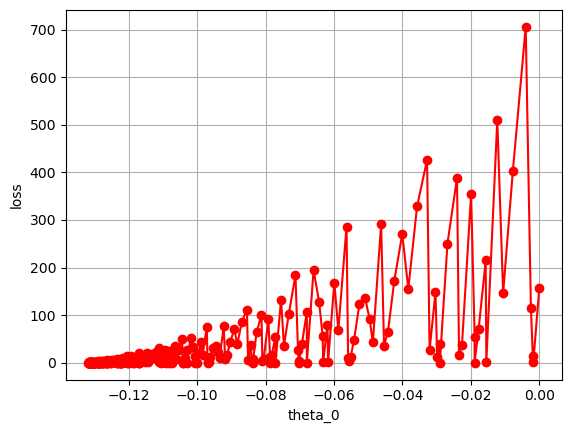

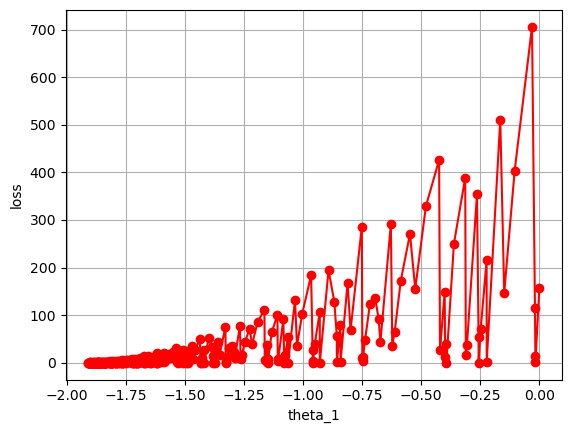

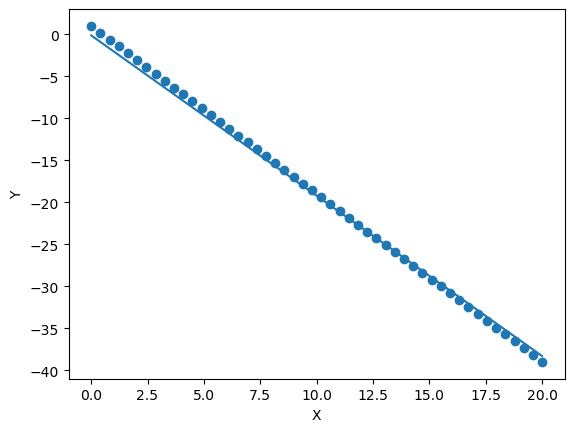

In [17]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

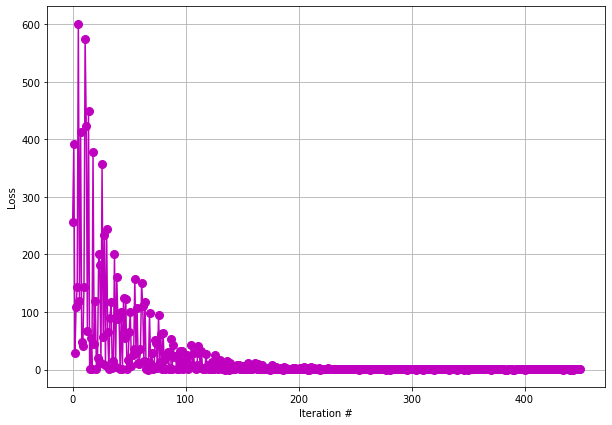

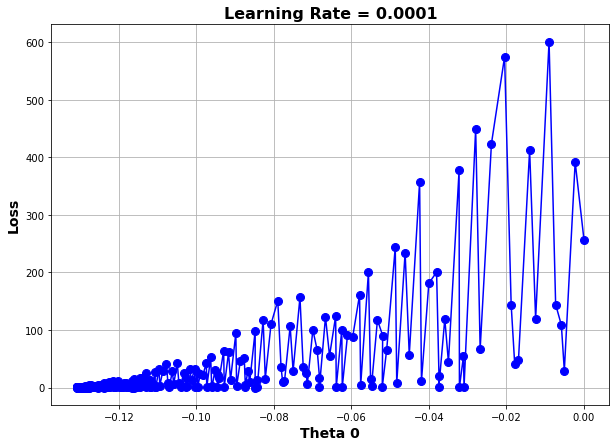

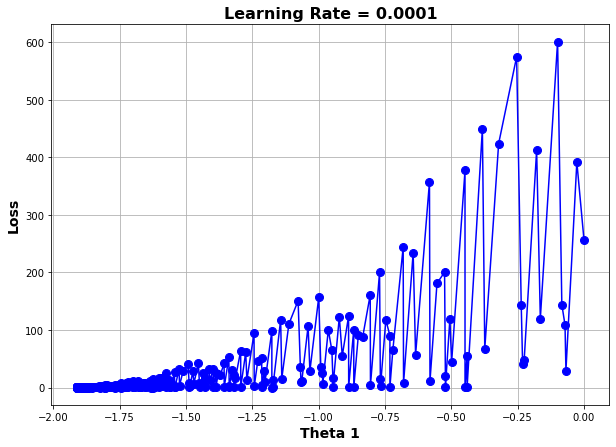

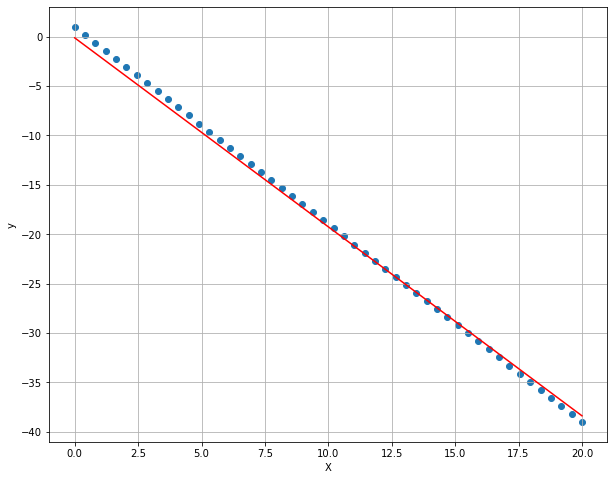

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [18]:
theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=Stochastic_GD_descent_function(X,y,0.00007,300)



****************** Epoch 0 ******************** 


error_vector [ 5.69736773e+00  2.28324522e+01  1.54340785e+00  1.14090626e+01
  4.65887776e+00  2.23132072e+01  4.13963277e+00  1.29667975e+01
  2.43901872e+01  7.77434767e+00  1.03705726e+01  1.08898176e+01
  2.02362273e+01  1.24475525e+01  6.73585770e+00  2.12747173e+01
  1.71207574e+01  1.50437775e+01 -1.43271033e-02 -5.33572088e-01
  3.10114280e+00  2.33516972e+01  5.04917881e-01  1.19283075e+01
  1.76400024e+01  7.25510268e+00  1.66015124e+01  1.97169823e+01
  9.85132760e+00  1.60822674e+01  1.86784923e+01  8.81283764e+00
  2.38709422e+01  1.45245325e+01  2.17939623e+01  9.33208262e+00
  1.40052875e+01  1.34860425e+01  1.91977373e+01  1.81592474e+01
 -1.05281707e+00  5.17812274e+00  2.58189782e+00  1.02416287e+00
  3.62038779e+00  6.21661271e+00  2.07554723e+01  2.06265284e+00
  1.55630224e+01  8.29359265e+00]
j 96.15280414542836
d_theta_0 -0.052817072587869184
d_theta_1 -0.7278497876835842
error_vector [ 5.69736773e+00  2.28324

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [19]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976420694651053


r2_score =  0.997655146572521


Text(0, 0.5, 'Y')

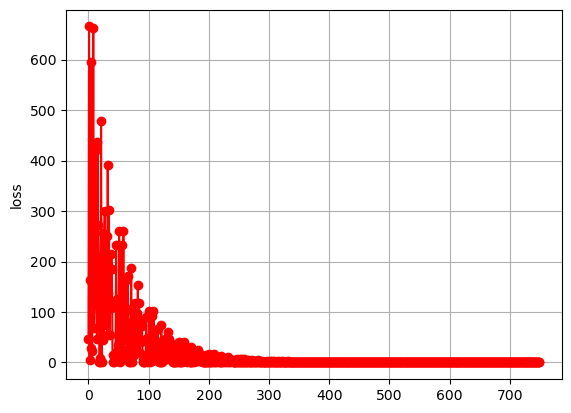

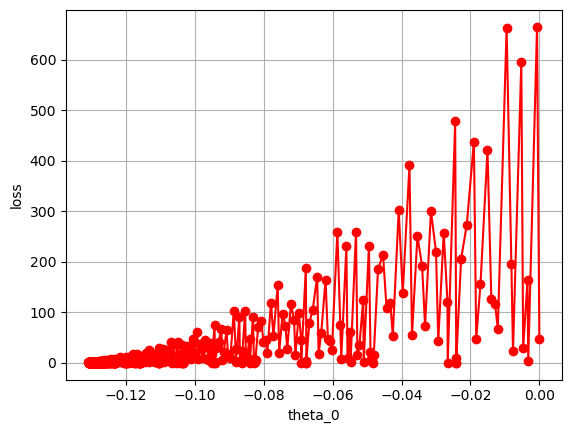

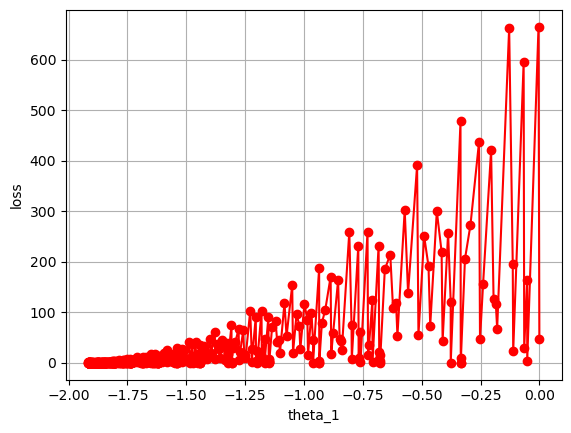

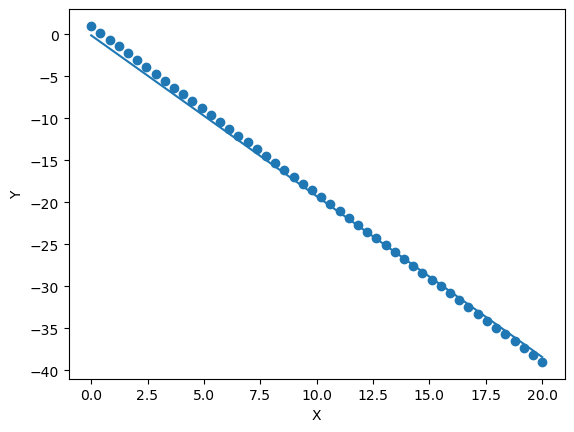

In [20]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

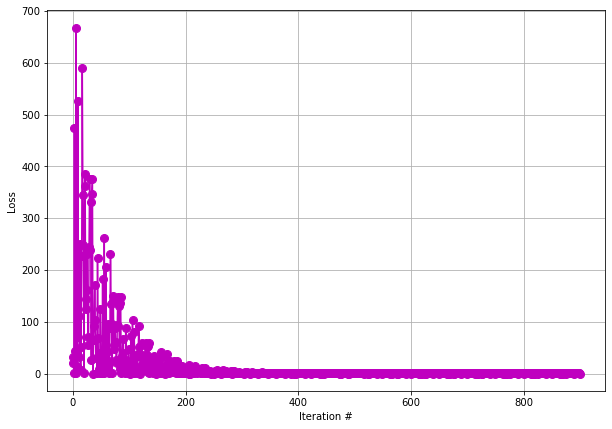

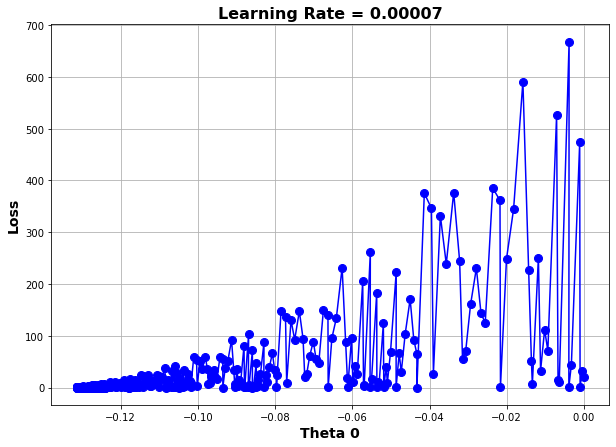

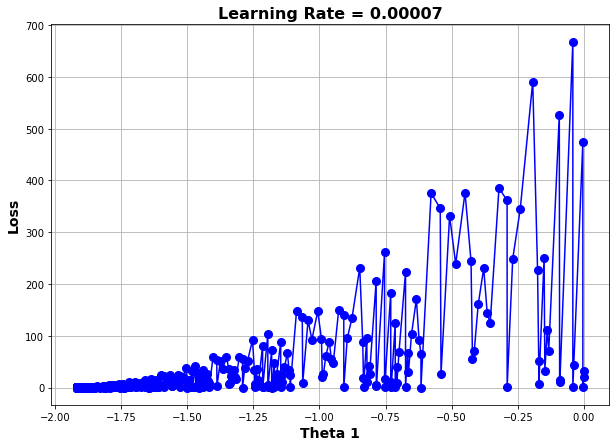

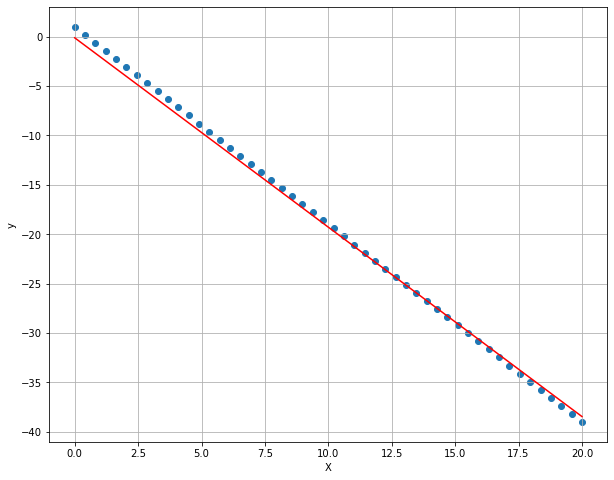

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [68]:
X.shape

(50,)

In [25]:
def mini_batch_descent_function(X,Y,lr,_max_number_of_iteration,batch_size):
    theta_0_new=0
    theta_1_new=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    h_x_array=[]
    perm = np.random.permutation(len(X))
    X = X[perm]
    Y = Y[perm]
    gradient_loss_checker=[]
    for i in range(_max_number_of_iteration):
        print(f'****************** Epoch {i} ******************** \n\n')
        for i in range(0,len(X),batch_size):
            x_batch=X[i:i+batch_size]
            y_batch=Y[i:i+batch_size]
            print("length of x_batch",len(x_batch))
            theta_0_array.append(theta_0_new)
            theta_1_array.append(theta_1_new)
            h_x=theta_0_new+theta_1_new*x_batch
            error_vector=h_x-y_batch
            
            j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
            loss_array.append(j)
            d_theta_0=error_vector.sum()/error_vector.shape[0]
            d_theta_1=(error_vector*x_batch).sum()/error_vector.shape[0]
            gradient_vector=np.array([d_theta_0,d_theta_1])
            
            theta_0_new=theta_0_new-lr*d_theta_0
            theta_1_new=theta_1_new-lr*d_theta_1
        h_x=theta_0_new+theta_1_new*X
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        gradient_loss_checker.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        print("error_vector",error_vector)
        print("j",j)
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
        if np.linalg.norm(gradient_vector)<0.4:
            print("break as gradient vector is almost 0")
            break
        if len(gradient_loss_checker)>1 and np.abs((gradient_loss_checker[-2]-gradient_loss_checker[-1]))<.0001:
            print("break as loss almost 0")
            break 
    return theta_0_array,theta_1_array,loss_array,theta_0_new,theta_1_new


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [26]:
theta_0_array,theta_1_array,loss_array,theta_0_new,theta_1_new=mini_batch_descent_function(X,y,0.0005,300,5)

****************** Epoch 0 ******************** 


length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
length of x_batch 5
error_vector [11.57337135  9.88746661 -0.2279618  13.25927608 16.20960937  7.78008569
  3.98680004  9.04451425 17.47403792  0.61499057 18.31699029  8.20156188
  1.87941912  4.40827622 -0.64943798 14.94518082  3.14384767 11.15189517
  0.19351439  1.45794294 12.41632372 15.366657   13.68075227 14.10222845
  4.82975241  2.3008953   7.35860951  3.56532386 10.73041898 19.15994266
  9.46599043 -1.07091417 17.05256174 14.52370464 12.8377999   6.09418096
  8.62303806 19.58141884 18.73846647  6.51565714  6.93713333  2.72237149
 10.3089428  16.63108556  5.67270478  5.25122859 17.89551411 11.99484753
  1.03646675 15.78813319]
j 61.326839239806475
d_theta_0 -0.07091416589990028
d_theta_1 -0.9673833496090664
error_vector [11.57337135  9.88746661 -0.227

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [27]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976341453429336


Text(0, 0.5, 'Y')

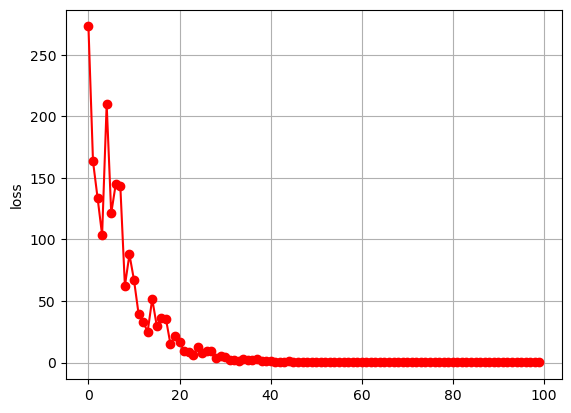

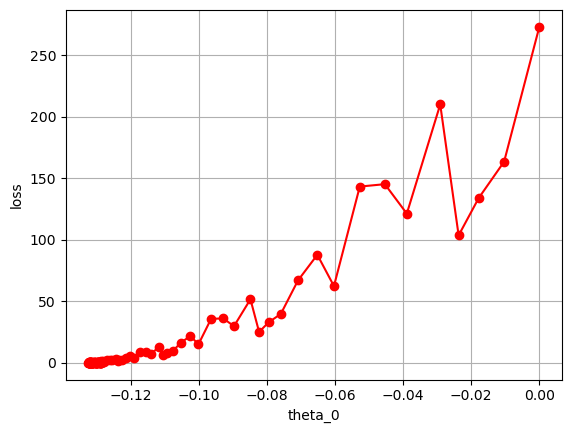

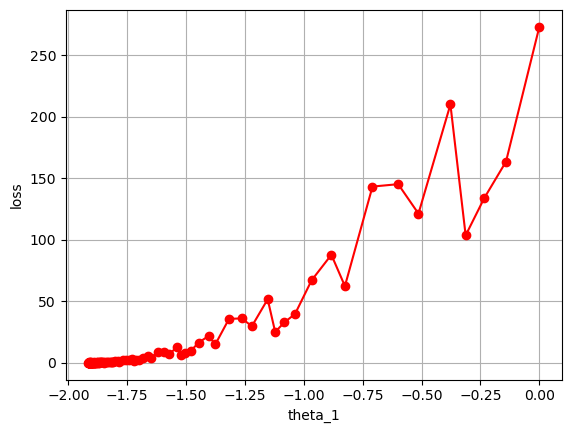

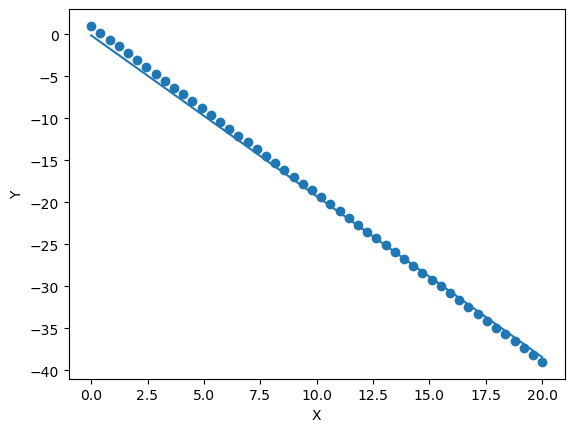

In [28]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

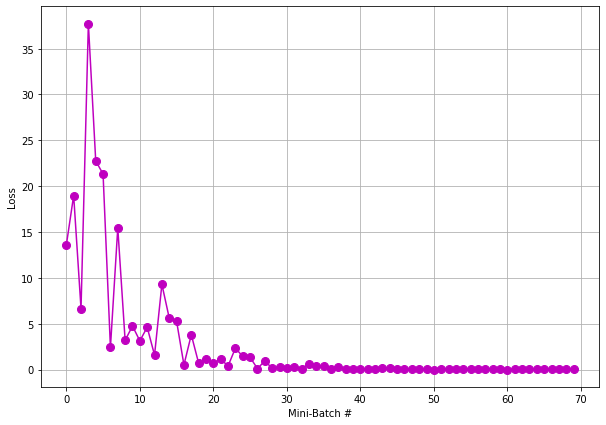

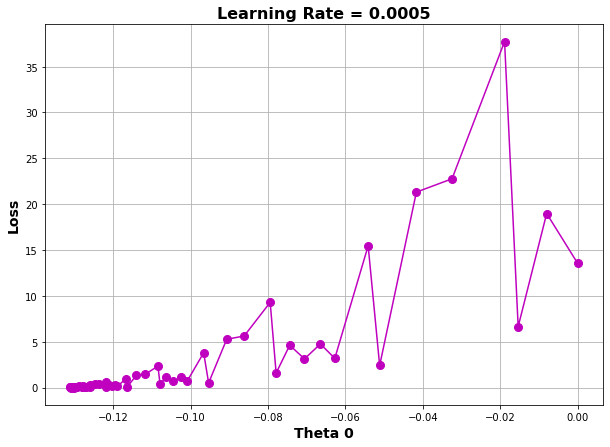

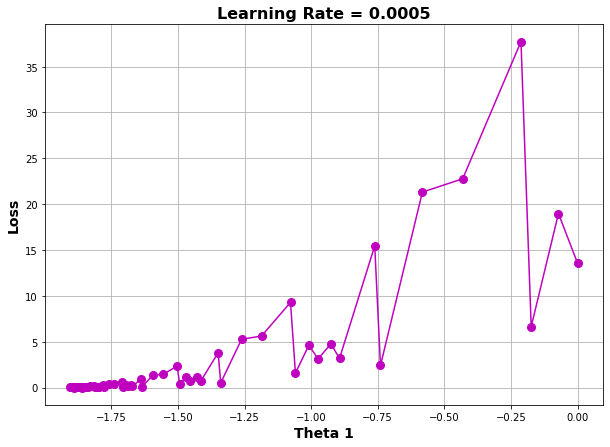

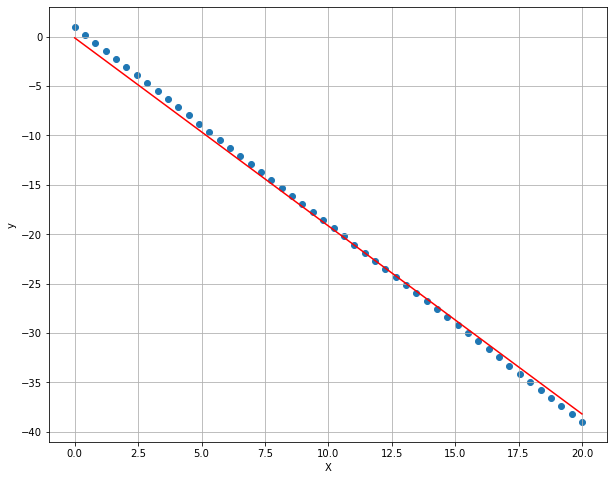

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [29]:
theta_0_array,theta_1_array,loss_array,theta_0_new,theta_1_new=mini_batch_descent_function(X,y,0.0005,300,10)

****************** Epoch 0 ******************** 


length of x_batch 10
length of x_batch 10
length of x_batch 10
length of x_batch 10
length of x_batch 10
error_vector [17.67079834 14.16223633 12.40795533  4.22131065 17.086038    7.72987265
 27.02696368 18.840319    5.39083132  8.89939332 25.27268268 15.91651733
 21.76412068  4.80607098 14.74699666  3.63655031 24.10316201  9.48415366
  7.14511232  1.29750898 15.331757   27.61172402 22.93364134  1.88226931
 22.34888101 24.68792235  5.97559165 12.99271566 18.25555867 16.50127767
 11.82319499  0.12798831 19.42507934 23.51840168 25.85744302  8.31463299
 26.44220335  3.05178998  6.56035198 10.06891399 -0.45677203 21.17936034
 13.577476   10.65367432 -1.04153236 20.00983967 20.59460001  2.46702964
  0.71274864 11.23843466]
j 123.85187211417472
d_theta_0 -0.04153236057973899
d_theta_1 -0.5673371810818607
error_vector [17.67079834 14.16223633 12.40795533  4.22131065 17.086038    7.72987265
 27.02696368 18.840319    5.39083132  8.89939332 25.2

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [30]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976355726946863


r2_score 0.9976302004574656


Text(0, 0.5, 'Y')

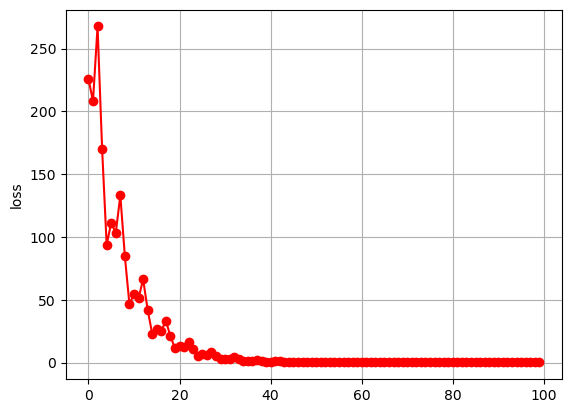

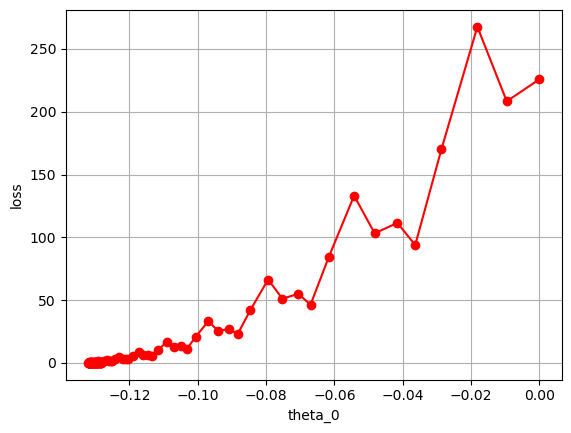

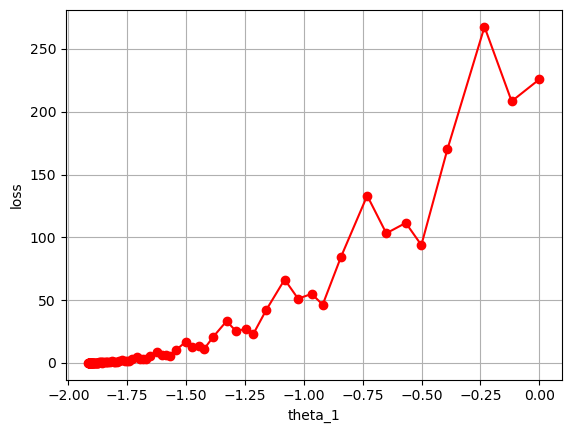

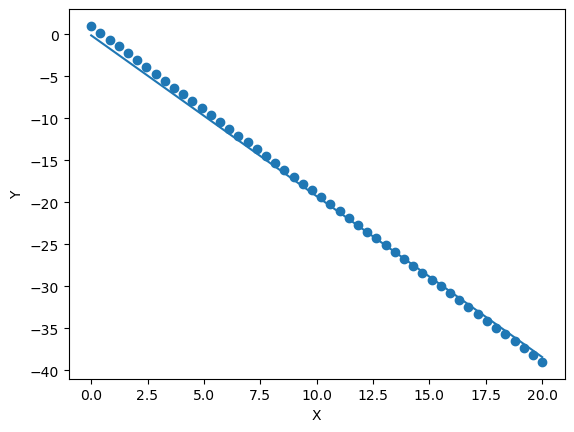

In [31]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

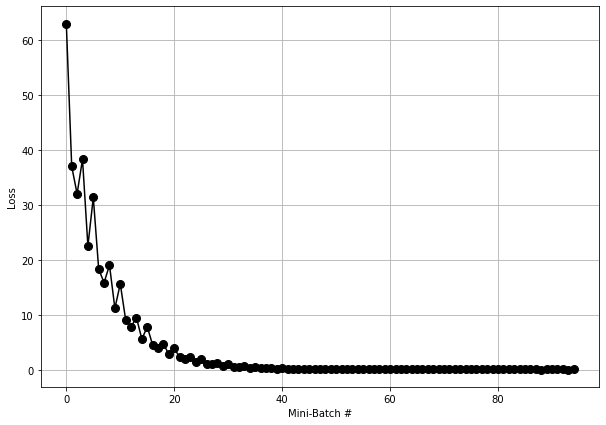

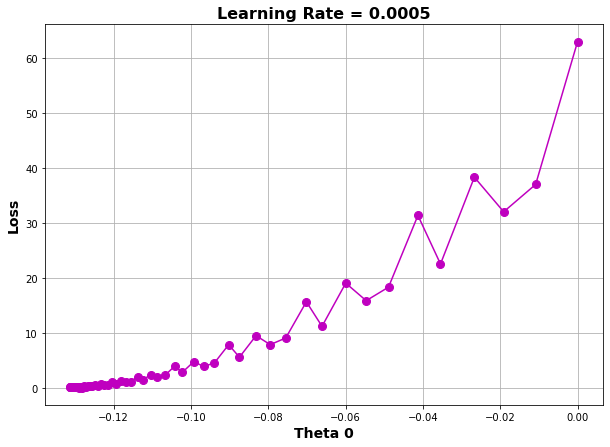

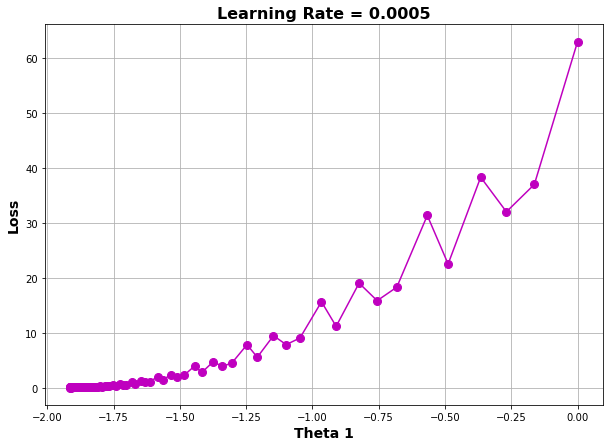

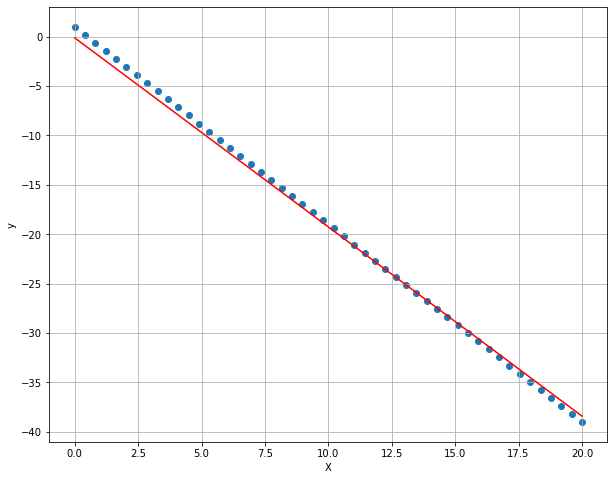

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [32]:
theta_0_array,theta_1_array,loss_array,theta_0_new,theta_1_new=mini_batch_descent_function(X,y,0.0005,300,20)

****************** Epoch 0 ******************** 


length of x_batch 20
length of x_batch 20
length of x_batch 10
error_vector [26.93498875 27.60074451 -1.02675315 20.94318692 12.28836204 18.28016388
 21.60894268 24.27196572 15.61714084  6.2965602  25.60347723  0.97051413
 -0.36099739 26.26923299  2.9677814   5.63080444 22.27469844 30.26376755
 10.95685052 20.27743116 12.9541178   8.29382748 17.61440812 24.93772147
 18.94591964 16.2828966   6.96231596 23.60620996  1.63626988  8.95958324
 11.62260628  0.30475837 29.59801179 14.95138508 10.29109476  2.30202564
  9.625339   31.59527907 22.9404542  13.61987356 14.28562932  3.63353716
  4.96504868 19.6116754   7.62807172 30.92952331 28.26650027  4.29929292
 16.94865236 28.93225603]
j 162.95574702774766
d_theta_0 -0.026753153863478162
d_theta_1 -0.3688983887065098
error_vector [26.93498875 27.60074451 -1.02675315 20.94318692 12.28836204 18.28016388
 21.60894268 24.27196572 15.61714084  6.2965602  25.60347723  0.97051413
 -0.36099739 26.26923

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [33]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(y,h_x))

r2_score:  0.9976370123675045


Text(0, 0.5, 'Y')

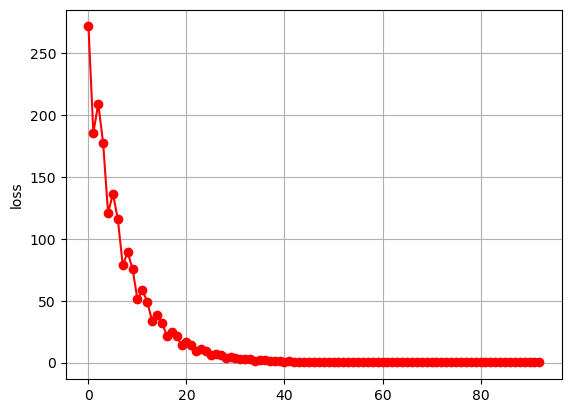

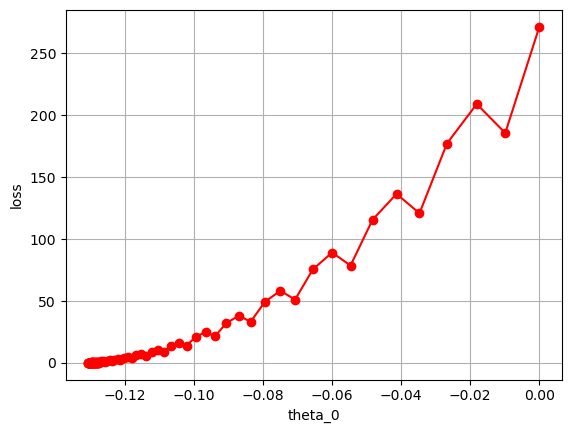

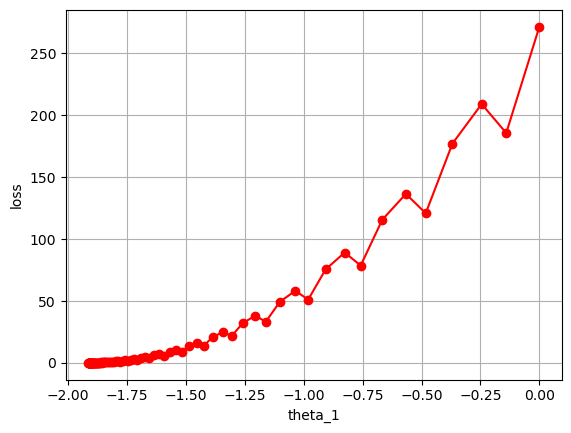

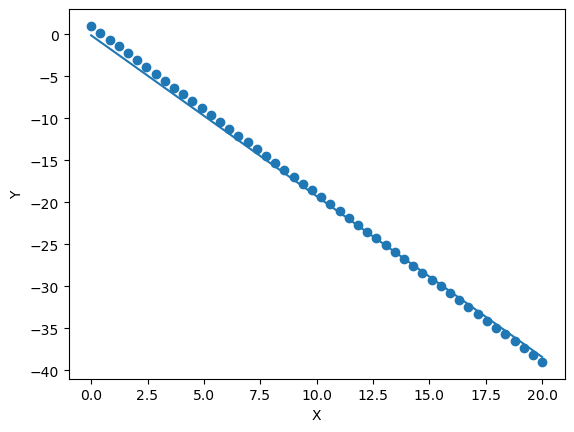

In [34]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)


    
plt.figure(5) 
plt.scatter(X,y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

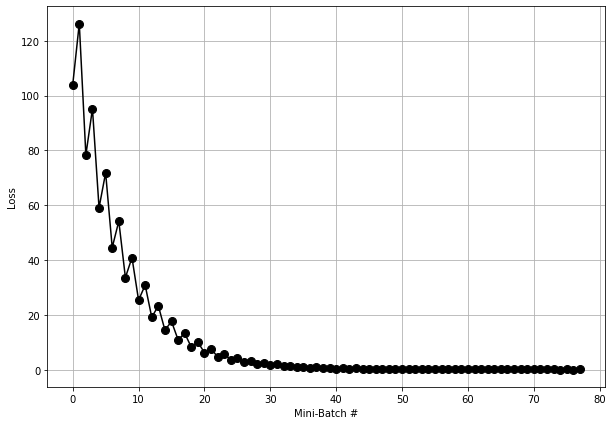

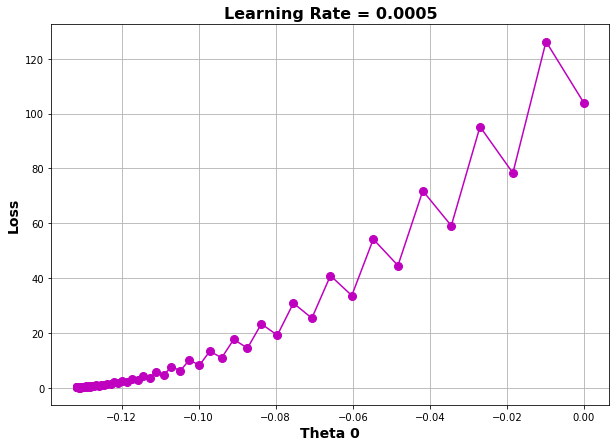

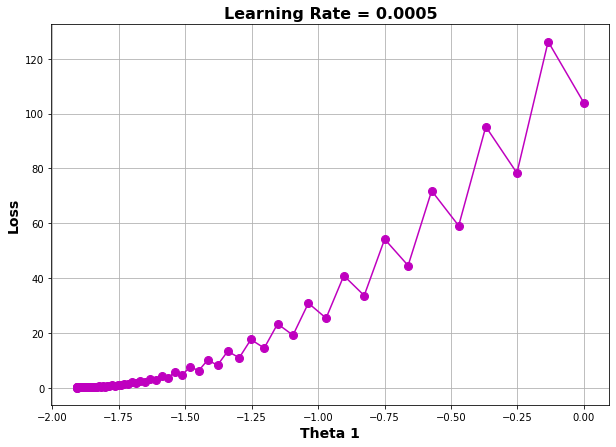

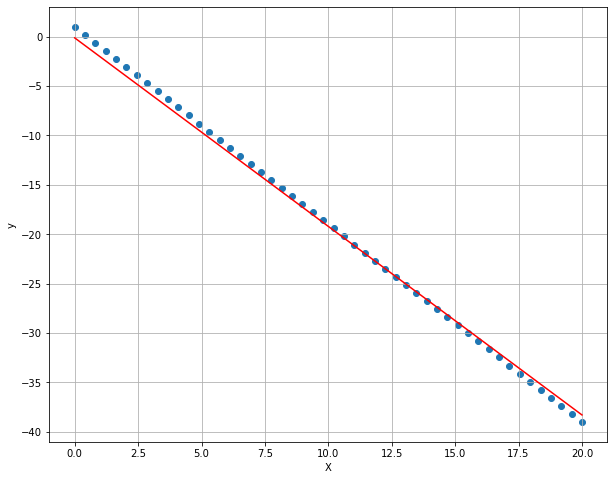